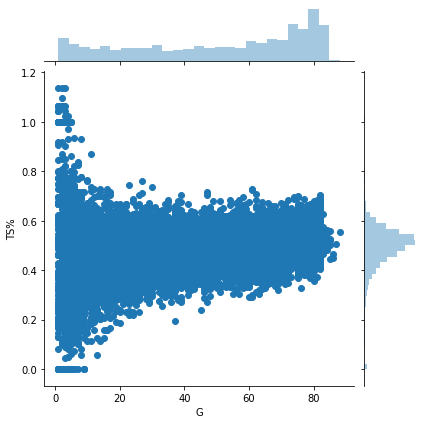

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

"""Переменные: кол-во игр, процент попадания
   Цель: проверить влияет ли опыт игрока на его средний показатель попадний за игру
   Использовал jointplot, чтобы наглядно показать корреляцию"""

df = pd.read_csv('/Users/mariadolgova/Downloads/nba-players-stats/Seasons_Stats.csv')

sns.jointplot(x='G', y='TS%', 
              data=df, kind='scatter')

# На данном графике я проверил корелляцию между кол-м игр, которые игрок провел за свои карьеру, и процентом попадания.
# Видно, что есть сильной зависимости нет:  средний % попадания ~50% вплоть до 80 игр за сезон
# Интересно, что есть игроки с минимальном количеством игр, но высоким  % попадания

In [133]:
"""Переменные: кол-во игр, процент попадания, суммарное кол-во очков
   Цель: проверить были ли повторения с низкими показателями или это был разовый случай/сезон
   Ради разнообразия реш воспользоваться условным форматированием"""

filtered_df = df[ (df.G <= 10) & (df.G > 1) & (df['TS%'] > 0.8) ]
group_1 = filtered_df.filter(items=['Year','Player','Pos', 'G', 'TS%', 'PTS']).sort_values(by='PTS', ascending = False).head(10)

def pts_per_game(a):
    """Среднее количество очков за игру"""
    return a['PTS'] / a['G']

group_1['AVG_PTS'] = group_1.apply(pts_per_game, axis=1)

group_2 = group_1.pivot_table(index = 'Year', columns = 'Player', values = 'AVG_PTS', aggfunc = 'mean', fill_value = 0).head()

group_2.style.bar()

# После исследования игроков с высоким % попадания и низким кол-м игра в сезлне стало понятно,
# что в среднем за игру они набирали не более 6,6 очков и играли не больше 1 сезона с такими показателями

Player,Amir Johnson,DeMarre Carroll,Frank Reddout,Jonathan Bender,Keith Bogans,Kenny Battle,Mike Peplowski,Peja Stojakovic,Steve Scheffler,Wayne Selden
Year,,,,,,,,,,
1954.0,0,0,1.85714,0,0,0,0,0,0,0
1992.0,0,0,0,0,0,1.75,0,0,0,0
1995.0,0,0,0,0,0,0,1.83333,0,0,0
1997.0,0,0,0,0,0,0,0,0,1.85714,0
2006.0,6.66667,0,0,5,0,0,0,0,0,0


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
17926,17926,2006.0,Amir Johnson,SF,18.0,DET,3.0,0.0,39.0,20.3,...,1.000,3.0,1.0,4.0,3.0,0.0,2.0,4.0,7.0,20.0
18471,18471,2007.0,Amir Johnson,PF,19.0,DET,8.0,0.0,124.0,20.6,...,0.786,15.0,22.0,37.0,3.0,5.0,13.0,9.0,19.0,47.0
19028,19028,2008.0,Amir Johnson,PF,20.0,DET,62.0,0.0,764.0,17.5,...,0.673,87.0,148.0,235.0,29.0,24.0,82.0,39.0,141.0,221.0
19623,19623,2009.0,Amir Johnson,PF,21.0,DET,62.0,24.0,911.0,13.5,...,0.657,102.0,130.0,232.0,20.0,20.0,60.0,33.0,171.0,217.0
20222,20222,2010.0,Amir Johnson,PF,22.0,TOR,82.0,5.0,1453.0,16.7,...,0.638,154.0,241.0,395.0,48.0,44.0,66.0,63.0,255.0,511.0
20825,20825,2011.0,Amir Johnson,PF,23.0,TOR,72.0,54.0,1853.0,17.6,...,0.788,189.0,272.0,461.0,81.0,53.0,88.0,69.0,263.0,688.0
21407,21407,2012.0,Amir Johnson,PF,24.0,TOR,64.0,43.0,1553.0,14.4,...,0.690,149.0,259.0,408.0,79.0,33.0,69.0,94.0,209.0,452.0
21945,21945,2013.0,Amir Johnson,PF,25.0,TOR,81.0,38.0,2325.0,17.3,...,0.727,227.0,384.0,611.0,122.0,81.0,110.0,117.0,301.0,813.0
22559,22559,2014.0,Amir Johnson,PF,26.0,TOR,77.0,72.0,2214.0,15.4,...,0.636,172.0,333.0,505.0,115.0,56.0,88.0,123.0,271.0,799.0
23166,23166,2015.0,Amir Johnson,PF,27.0,TOR,75.0,72.0,1979.0,15.4,...,0.612,159.0,297.0,456.0,117.0,44.0,59.0,110.0,225.0,694.0


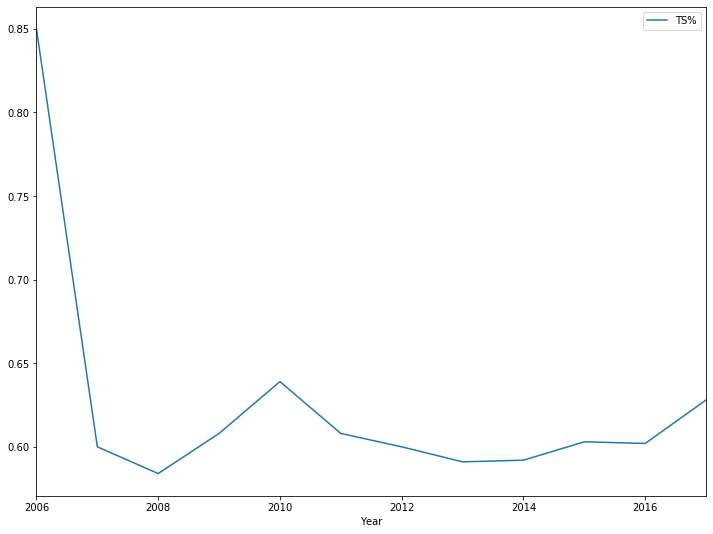

In [144]:
# Сначаал я подмул, что игроки получали травму и завершали карьеру, но после детального анализа
# стало понятно, что все они сыграли очень мало игр за данные года

"""Переменные: игрок, год, процент попадания
   Цель: проверить динамику изменения процента попадания для конкретного игрока,
   у которого были низкие показатели в начале карьеры
   Выбрал обычную кривую, чтобы проследить динамику"""

Amir_Johnson = df[ df.Player == 'Amir Johnson']
Amir_Johnson.filter(items = ['Year', 'TS%']).plot(x='Year', y='TS%')
Amir_Johnson

# Например, Amir Johnson провел свои первые 2 сезона с 3 и 8 играми соответственно
# В 2008 году он вышел на корт 62 раза, где и начал устаканиваться средний % попаданий

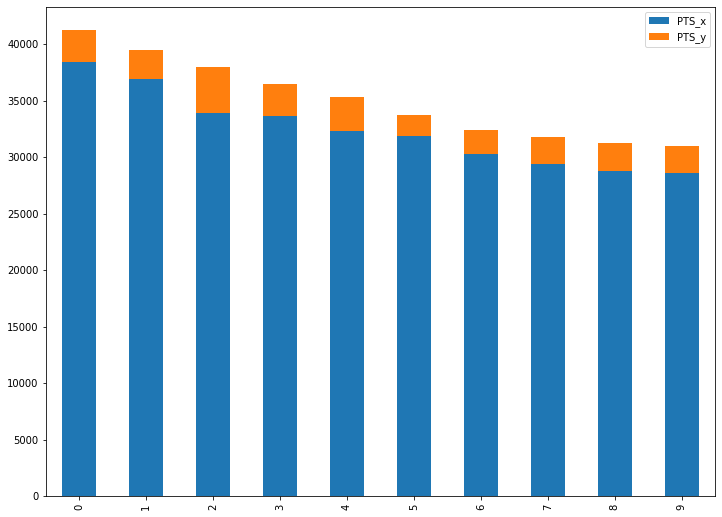

In [190]:
"""Переменные: набранные очки за карьеру и максимальное кол-во очков за 1 сезон
   Цель: проверить как соотносится раникнг очками за карьеру у топ-10 игроков и их максимумом за сезон
   Выбрал stacked bar, т.к. на нем можно неплохо проследить динамику между всем игроками"""

goat = df.groupby('Player').sum().sort_values(by='PTS', ascending = False).reset_index().head(10)
max_per_season = df.groupby('Player').max().sort_values(by='PTS', ascending = False).filter(items = ['year', 'PTS']).reset_index()

merged = goat.merge(max_per_season, how = 'inner', on = 'Player').filter(items=['Player','PTS_x', 'PTS_y'])

merged.plot.bar(stacked=True)

# Не очень понял как изменить подписи оси X, чтобы вместо индексов отображались имена игроков
# На графике представлены топ-10 игроков по суммарному кол-ву очков за всю карьеру
# Так же выведен максимум за 1 лучший сезон
# Хотел проверить как эти 2 показателя бьются между собой - оказалос, что они стабильно набирали много очков
# каждый сезон, и не было такого, что они стали лучшими из-за одного удачного сезона


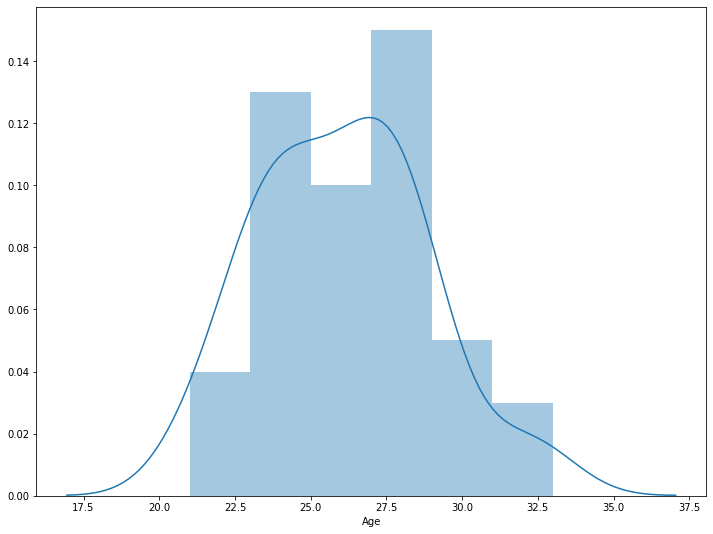

In [203]:
"""Переменные: набранные очки за карьеру и возраст игрока
   Цель: проверить распределние возраста среди топ-50 игроково за все время
   Выбрал пал на distplot потому что здесь можно увидеть кривую распределения"""

top_50 = df.sort_values(by='PTS', ascending = False).head(50)

sns.distplot(top_50['Age'])
